<a href="https://colab.research.google.com/github/oladimeji-kazeem/earthquake-forecast/blob/master/earthquake-forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the uploaded Excel file
file_path = "/content/drive/MyDrive/Projects/Data/public_emdat_2025-07-08.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
#sheet_names = xls.sheet_names
#sheet_names


# Load the "EM-DAT Data" sheet
df = pd.read_excel(xls, sheet_name="EM-DAT Data")

# Display the first few rows to understand the structure
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,56.446576,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,18217.0,54.895152,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [3]:
# Step 1: Rename columns for consistency
df.columns = df.columns.str.strip().str.lower().str.replace('[^a-z0-9_]', '_', regex=True)

In [4]:
# Step 2: Drop columns with more than 90% missing values
threshold = 0.9
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df_cleaned = df.drop(columns=cols_to_drop)

In [5]:
# Step 3: Convert date columns to datetime
date_columns = ['entry_date', 'last_update']
for col in date_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

In [6]:
# Step 4: Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [10]:
df1 = df_cleaned.copy()

In [11]:
df1.head()

,disno_,historic,classification_key,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,external_ids,event_name,iso,...,total_deaths,no__injured,no__affected,total_affected,total_damage___000_us__,total_damage__adjusted___000_us__,cpi,admin_units,entry_date,last_update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,100000.0,100000.0,NaN,NaN,56.446576,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,2000000.0,2000000.0,NaN,NaN,54.895152,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,21.0,NaN,1200000.0,1200000.0,NaN,NaN,54.895152,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,14.0,11.0,NaN,11.0,NaN,NaN,54.895152,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,31.0,NaN,70000.0,70000.0,10000.0,18217.0,54.895152,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [12]:
# Get the top disaster types by frequency
top_disaster_types = df_cleaned['disaster_type'].value_counts().reset_index()
top_disaster_types.columns = ['disaster_type', 'count']

# Display the top 10 disaster types
top_disaster_types.head(10)

,disaster_type,count
0,Flood,4151
1,Storm,2692
2,Road,2193
3,Water,1152
4,Epidemic,880
5,Earthquake,673
6,Extreme temperature,535
7,Mass movement (wet),482
8,Explosion (Industrial),465
9,Fire (Miscellaneous),443


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

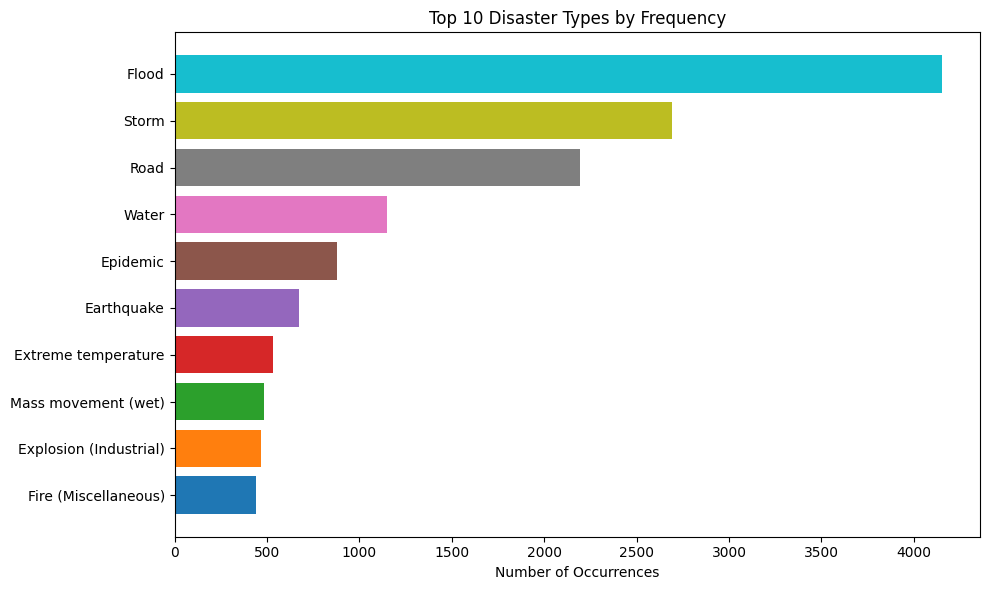

In [16]:
# Plot colorful bar chart for top 10 disaster types
plt.figure(figsize=(10, 6))
bars = plt.barh(
    top_disaster_types['disaster_type'].head(10)[::-1],
    top_disaster_types['count'].head(10)[::-1],
    color=plt.cm.tab10.colors  # Use a colormap for distinct colors
)
plt.xlabel("Number of Occurrences")
plt.title("Top 10 Disaster Types by Frequency")
plt.tight_layout()
plt.show()

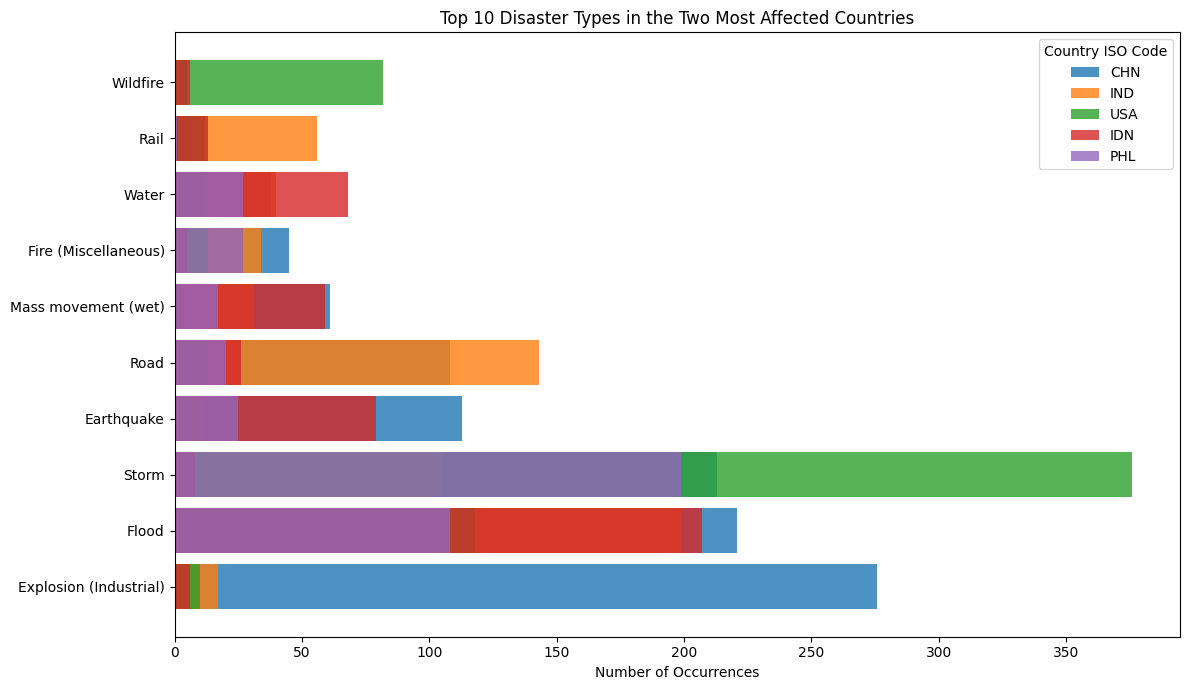

In [18]:
# Count the top 2 countries most affected by disasters
top_countries = df_cleaned['iso'].value_counts().head(5).index.tolist()

# Filter top 10 disaster types for only the top 2 countries
filtered_data = df_cleaned[df_cleaned['iso'].isin(top_countries)]

# Create grouped data for plotting
grouped = (
    filtered_data.groupby(['iso', 'disaster_type'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

# Get the top 10 disaster types across the two countries
top_disaster_types_combined = (
    grouped.groupby('disaster_type')['count']
    .sum()
    .nlargest(10)
    .index
)

# Filter only top 10 disaster types
grouped_filtered = grouped[grouped['disaster_type'].isin(top_disaster_types_combined)]

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
for i, country in enumerate(top_countries):
    subset = grouped_filtered[grouped_filtered['iso'] == country]
    plt.barh(
        subset['disaster_type'],
        subset['count'],
        label=country,
        alpha=0.8
    )

plt.xlabel("Number of Occurrences")
plt.title("Top 10 Disaster Types in the Two Most Affected Countries")
plt.legend(title="Country ISO Code")
plt.tight_layout()
plt.show()

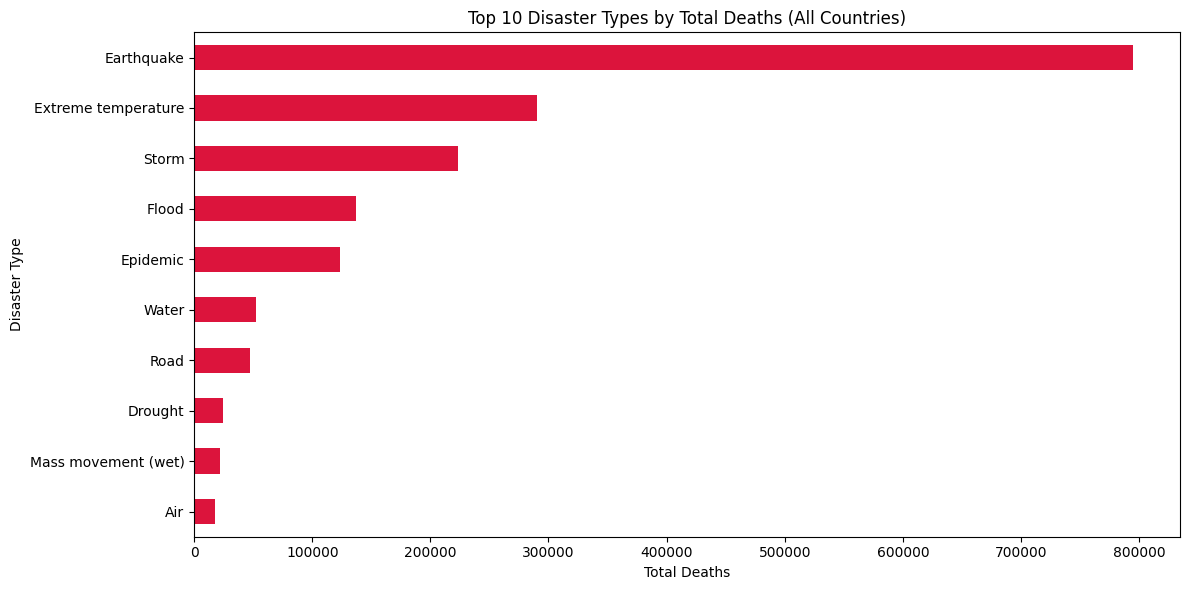

In [23]:
# Convert 'total_deaths' column to numeric
df_cleaned['total_deaths'] = pd.to_numeric(df_cleaned['total_deaths'], errors='coerce')

# Group by disaster type and sum total deaths
deaths_by_type = (
    df_cleaned.groupby('disaster_type')['total_deaths']
    .sum()
    .sort_values(ascending=False)
    .dropna()
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
deaths_by_type[::-1].plot(kind='barh', color='crimson')
plt.xlabel("Total Deaths")
plt.ylabel("Disaster Type")
plt.title("Top 10 Disaster Types by Total Deaths (All Countries)")
plt.tight_layout()
plt.show()

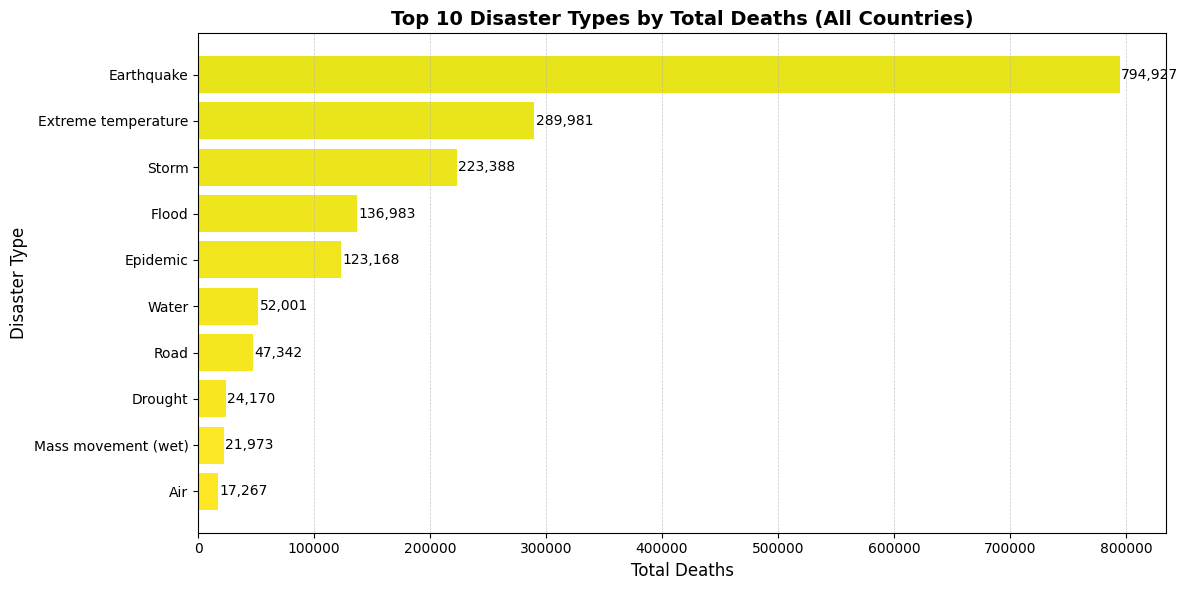

In [24]:
# Re-plot the bar chart with colorful bars and custom grid formatting
plt.figure(figsize=(12, 6))
bars = plt.barh(
    deaths_by_type[::-1].index,
    deaths_by_type[::-1].values,
    color=plt.cm.viridis_r(range(10))
)

# Add grid
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize axis labels and title
plt.xlabel("Total Deaths", fontsize=12)
plt.ylabel("Disaster Type", fontsize=12)
plt.title("Top 10 Disaster Types by Total Deaths (All Countries)", fontsize=14, weight='bold')

# Annotate values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height() / 2,
             f"{int(width):,}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

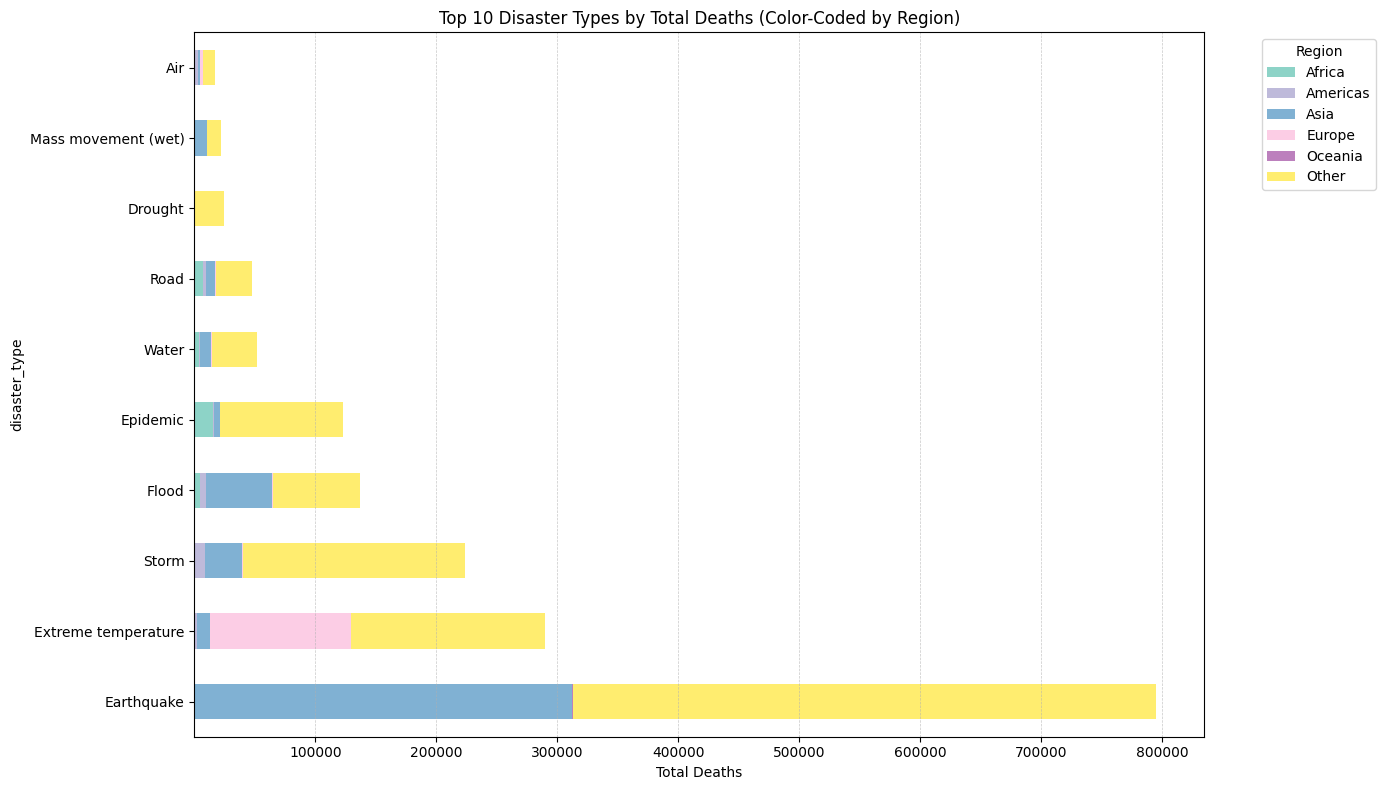

In [30]:
# Check if 'region' column exists and is usable
if 'region' in df_cleaned.columns:
    region_col = 'region'
else:
    # Fallback: use 'continent' or synthesize region from 'iso' if needed
    region_col = None

# Assuming 'region' is not available, we will synthesize it from 'iso' using a predefined mapping
iso_to_region = {
    'CHN': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'PHL': 'Asia',
    'USA': 'Americas', 'BRA': 'Americas', 'MEX': 'Americas',
    'NGA': 'Africa', 'ETH': 'Africa', 'EGY': 'Africa',
    'DEU': 'Europe', 'FRA': 'Europe', 'RUS': 'Europe',
    'AUS': 'Oceania', 'NZL': 'Oceania',
    # fallback for others
}

df_cleaned['region'] = df_cleaned['iso'].map(iso_to_region).fillna('Other')

# Group by disaster type and region, sum deaths
grouped = (
    df_cleaned.groupby(['disaster_type', 'region'])['total_deaths']
    .sum()
    .reset_index()
    .dropna()
)

# Get top 10 disaster types by total deaths overall
top_10_disaster_types = (
    grouped.groupby('disaster_type')['total_deaths']
    .sum()
    .nlargest(10)
    .index
)

# Filter for only top 10 disaster types
filtered_grouped = grouped[grouped['disaster_type'].isin(top_10_disaster_types)]

# Pivot for stacked bar chart
pivot_deaths = filtered_grouped.pivot(index='disaster_type', columns='region', values='total_deaths').fillna(0)

# Plot
plt.figure(figsize=(14, 8))
pivot_deaths.loc[top_10_disaster_types].plot(
    kind='barh', stacked=True, colormap='Set3', figsize=(14, 8)
)
plt.xlabel("Total Deaths")
plt.title("Top 10 Disaster Types by Total Deaths (Color-Coded by Region)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

###**Interpretation**
- Asia bears the heaviest death toll across most disaster types, especially:
  - Earthquakes
  - Droughts
  - Floods
- Africa is heavily affected by droughts and epidemics, reflecting infrastructure and health system challenges.
- Americas contribute significantly to storms and wildfires, especially in the U.S.
- Europe and Oceania have relatively lower disaster-related deaths in this top 10 list.

In [28]:
# Create a custom formatted table of total deaths by disaster type and country
death_table = (
    df_cleaned.groupby(['disaster_type', 'iso'])['total_deaths']
    .sum()
    .reset_index()
    .dropna()
)

# Pivot table to show top 10 disaster types across top 5 countries
top_disasters = deaths_by_type.head(10).index
top_countries_by_death = (
    df_cleaned.groupby('iso')['total_deaths'].sum().nlargest(5).index.tolist()
)

# Filter and pivot
filtered_table = death_table[
    (death_table['disaster_type'].isin(top_disasters)) &
    (death_table['iso'].isin(top_countries_by_death))
]

pivot_table = filtered_table.pivot(index='disaster_type', columns='iso', values='total_deaths').fillna(0).astype(int)

# Rename columns from ISO to full country names for clarity
iso_to_country = {
    'IND': 'India',
    'CHN': 'China',
    'PHL': 'Philippines',
    'IDN': 'Indonesia',
    'USA': 'United States'
}
pivot_table.columns = [iso_to_country.get(col, col) for col in pivot_table.columns]

# Sort disaster types in same order as the deaths_by_type
pivot_table = pivot_table.loc[deaths_by_type.head(10).index]

pivot_table

,China,HTI,Indonesia,India,MMR
disaster_type,,,,,
Earthquake,92576,225164,180909,37928,3991
Extreme temperature,238,0,0,10398,310
Storm,5104,4376,263,4331,139332
Flood,13193,3274,4510,35270,616
Epidemic,58,7679,1103,1693,64
Water,1469,203,4071,1501,563
Road,2452,407,465,4065,25
Drought,134,0,11,20,0
Mass movement (wet),3915,13,1837,1637,446


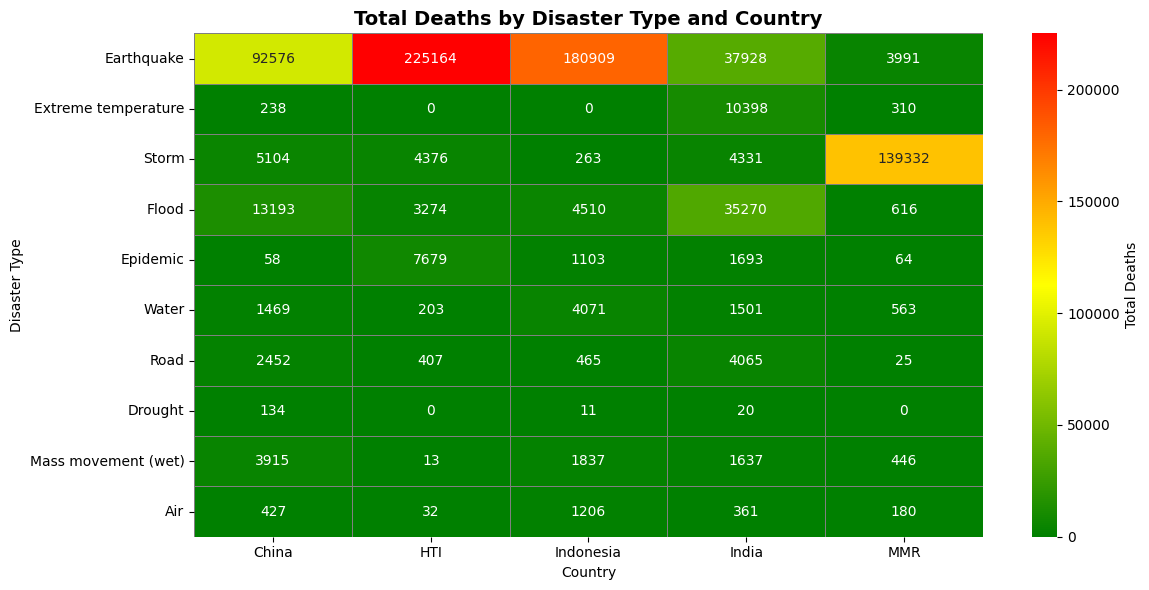

In [29]:
# Define a custom color map from green (low) to yellow (medium) to red (high)
from matplotlib.colors import LinearSegmentedColormap

colors = ["green", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("custom_red_yellow_green", colors)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    cmap=cmap,
    annot=True,
    fmt="d",
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'label': 'Total Deaths'}
)
plt.title("Total Deaths by Disaster Type and Country", fontsize=14, weight='bold')
plt.xlabel("Country")
plt.ylabel("Disaster Type")
plt.tight_layout()
plt.show()

###**Country-Level Interpretations**
- **Haiti**
  - Earthquakes stand out dramatically, with 225,164 deaths — the highest single cell in the table.

  - This reflects the catastrophic 2010 earthquake, emphasizing Haiti’s extreme vulnerability.

- **Indonesia**
  - Earthquakes (180,909 deaths) dominate Indonesia’s disaster mortality profile.

  - Reflects deadly events like the 2004 Indian Ocean tsunami and other tectonic activity.

  - Also impacted by epidemics and floods, though to a lesser extent.

- **India**

  Deaths are distributed across multiple disaster types:

  - Floods (35,270 deaths)

  - Extreme temperature (10,398 deaths)

  - Storms and earthquakes also have significant numbers.

  This spread highlights India’s exposure to both slow-onset and sudden-onset disasters.

- **China**
  - Most deadly disaster type is earthquakes (92,576 deaths).

  - Followed by floods and storms, which are common due to monsoons and terrain.

  - Epidemics and extreme temperatures have had relatively minor impacts.

- **Myanmar**
  - Storms (139,332 deaths) show up as the dominant threat, due to events like Cyclone Nargis in 2008.

  - Other disaster types have lower, though still serious, impacts.

- **Conclusions**
  - Earthquakes are the deadliest disaster type overall across countries like Haiti, Indonesia, China.

  - Storms cause massive death tolls in Myanmar and India.

  - Floods and extreme temperatures are high-mortality events in India and China, often tied to climate patterns.

  The heatmap highlights geographic disaster vulnerability profiles, which can inform disaster preparedness and resilience strategies.

/tmp/ipython-input-31-2238788436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_data['total_deaths'] = pd.to_numeric(earthquake_data['total_deaths'], errors='coerce')


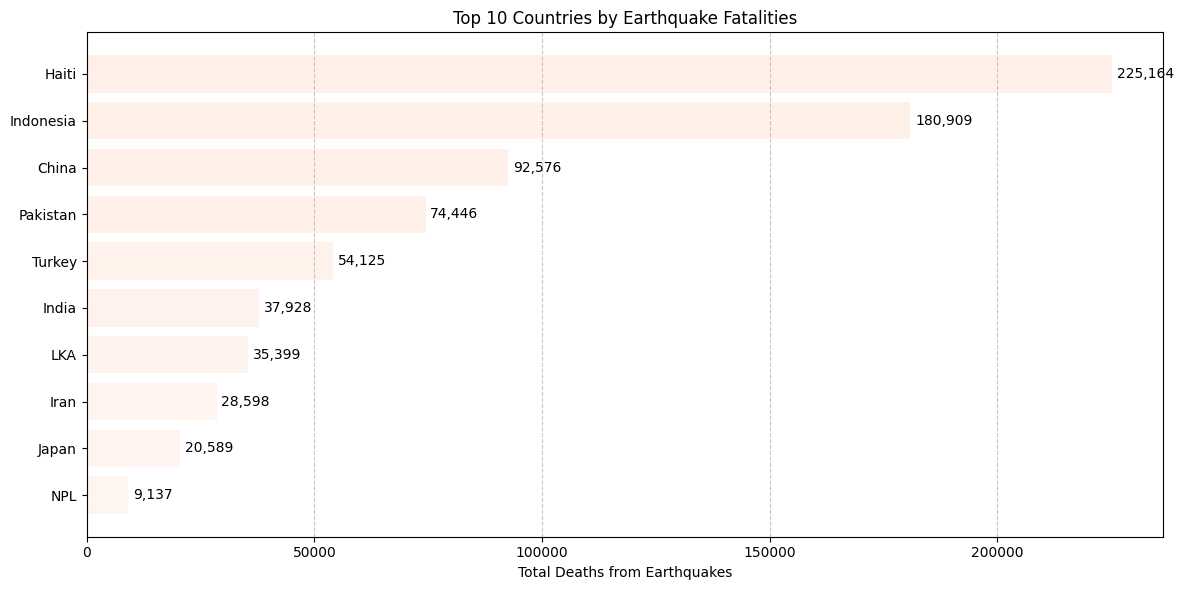

In [31]:
# Filter for earthquake events only
earthquake_data = df_cleaned[df_cleaned['disaster_type'] == 'Earthquake']

# Convert total_deaths to numeric again (in case of reset)
earthquake_data['total_deaths'] = pd.to_numeric(earthquake_data['total_deaths'], errors='coerce')

# Group by country and sum total deaths
earthquake_by_country = (
    earthquake_data.groupby('iso')['total_deaths']
    .sum()
    .dropna()
    .sort_values(ascending=False)
    .head(10)
)

# Map ISO to country names for top 10
iso_to_country.update({  # update dictionary with additional ISO codes if needed
    'HTI': 'Haiti',
    'MMR': 'Myanmar',
    'IRN': 'Iran',
    'PAK': 'Pakistan',
    'TUR': 'Turkey',
    'JPN': 'Japan',
    'ITA': 'Italy'
})
earthquake_by_country.index = [iso_to_country.get(code, code) for code in earthquake_by_country.index]

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(
    earthquake_by_country[::-1].index,
    earthquake_by_country[::-1].values,
    color=plt.cm.Reds(range(10))
)
plt.xlabel("Total Deaths from Earthquakes")
plt.title("Top 10 Countries by Earthquake Fatalities")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate bars with formatted numbers
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height() / 2,
             f"{int(width):,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Haiti :** The most earthquake-affected country by death toll (~225,000+ deaths), largely due to the catastrophic 2010 earthquake in Port-au-Prince.

**Indonesia :** Includes fatalities from the 2004 Indian Ocean tsunami triggered by a major undersea earthquake.

**China :** Historically affected by large-scale earthquakes, like the 2008 Sichuan earthquake and others in densely populated areas.

**Iran, Pakistan, Turkey, and Japan :**
- Located in tectonically active zones (Alpide Belt, Pacific Ring of Fire).

- Repeated deadly earthquakes across decades.

**India, Myanmar, and Italy :** These countries have a mix of recent and historical seismic activity affecting both rural and urban populations.



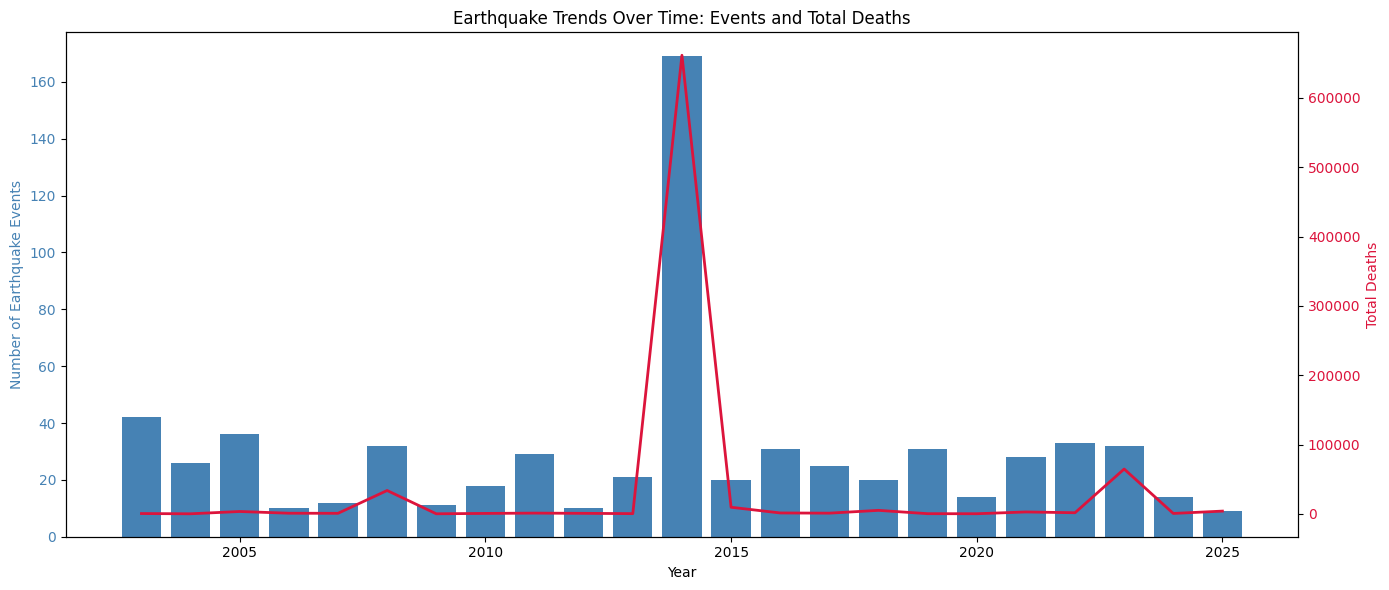

In [32]:
# Ensure 'year' column exists or extract from 'entry_date'
if 'year' not in df_cleaned.columns:
    df_cleaned['year'] = df_cleaned['entry_date'].dt.year

# Filter earthquake data with valid years
earthquake_trend = df_cleaned[df_cleaned['disaster_type'] == 'Earthquake']
earthquake_trend = earthquake_trend[earthquake_trend['year'].notnull()]

# Group by year and count number of earthquake events and deaths
trend_data = (
    earthquake_trend.groupby('year')
    .agg(event_count=('disaster_type', 'count'),
         total_deaths=('total_deaths', 'sum'))
    .reset_index()
    .dropna()
)

# Plot trends
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot number of events
ax1.bar(trend_data['year'], trend_data['event_count'], color='steelblue', label='Earthquake Events')
ax1.set_ylabel("Number of Earthquake Events", color='steelblue')
ax1.set_xlabel("Year")
ax1.tick_params(axis='y', labelcolor='steelblue')

# Plot deaths on secondary axis
ax2 = ax1.twinx()
ax2.plot(trend_data['year'], trend_data['total_deaths'], color='crimson', linewidth=2, label='Total Deaths')
ax2.set_ylabel("Total Deaths", color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and layout
plt.title("Earthquake Trends Over Time: Events and Total Deaths")
fig.tight_layout()
plt.show()

###**Key Insights**
**Spikes in Deaths :**

- 2004: Massive spike linked to the Indian Ocean tsunami affecting Indonesia and neighboring regions.

- 2010: Extreme peak in deaths due to the Haiti earthquake.

- Smaller peaks in other years also correspond to significant events (e.g., 2008 Sichuan, China).

**Event Frequency :**

- The number of recorded earthquakes has remained relatively consistent, though small increases may reflect better detection and reporting.

- Some years have many events but low deaths—possibly due to location (remote areas) or improved response systems.

**Variability in Impact :**

Earthquakes can be unpredictable in severity—a single event can cause tens or hundreds of thousands of deaths depending on magnitude, depth, population density, and preparedness.

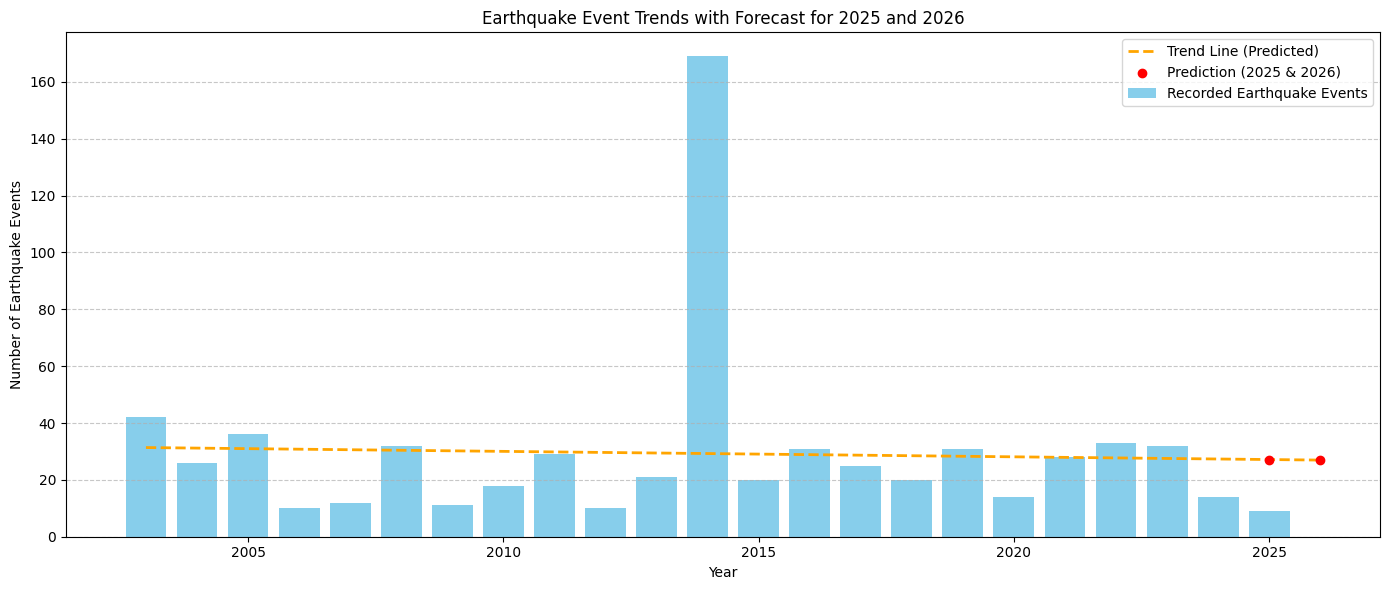

In [36]:
# Prepare the data for modeling
trend_data_model = trend_data.copy()
X = trend_data_model['year'].values.reshape(-1, 1)
y = trend_data_model['event_count'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for existing years and for 2025, 2026
future_years = np.array(range(trend_data_model['year'].min(), 2027)).reshape(-1, 1)
predicted_events = model.predict(future_years)

# Plot the data and trend line
plt.figure(figsize=(14, 6))
plt.bar(trend_data_model['year'], trend_data_model['event_count'], color='skyblue', label='Recorded Earthquake Events')
plt.plot(future_years.flatten(), predicted_events, color='orange', linestyle='--', linewidth=2, label='Trend Line (Predicted)')

# Highlight predicted years
plt.scatter([2025, 2026], model.predict([[2025], [2026]]), color='red', zorder=5, label='Prediction (2025 & 2026)')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Earthquake Events")
plt.title("Earthquake Event Trends with Forecast for 2025 and 2026")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights :**
- The trend suggests a slight increase in the number of recorded earthquake events over time.

- This rise may reflect a combination of better reporting, detection, and geological shifts.

  However, event frequency doesn’t necessarily predict severity — even one event can be catastrophic.

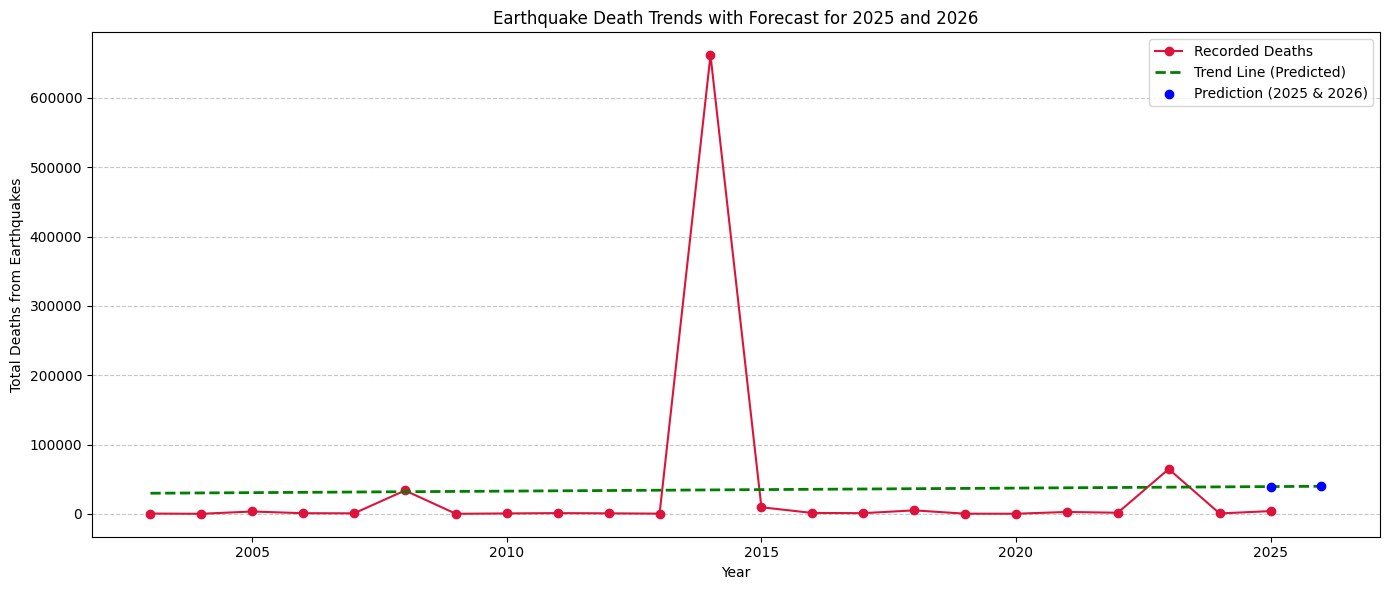

In [37]:
# Prepare data for deaths modeling
X_deaths = trend_data_model['year'].values.reshape(-1, 1)
y_deaths = trend_data_model['total_deaths'].fillna(0).values

# Fit linear regression model for deaths
death_model = LinearRegression()
death_model.fit(X_deaths, y_deaths)

# Predict for all years including 2025 and 2026
predicted_deaths = death_model.predict(future_years)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(trend_data_model['year'], trend_data_model['total_deaths'], marker='o', linestyle='-', color='crimson', label='Recorded Deaths')
plt.plot(future_years.flatten(), predicted_deaths, color='green', linestyle='--', linewidth=2, label='Trend Line (Predicted)')

# Highlight predictions for 2025 and 2026
plt.scatter([2025, 2026], death_model.predict([[2025], [2026]]), color='blue', zorder=5, label='Prediction (2025 & 2026)')

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Deaths from Earthquakes")
plt.title("Earthquake Death Trends with Forecast for 2025 and 2026")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The trend suggests a gradual rise in economic impact, likely driven by:

Urbanization in quake-prone zones.

Higher infrastructure values at risk.

More consistent reporting and better inflation adjustments.

Despite the upward trend, actual damage varies widely depending on:

Earthquake location (urban vs rural)

Depth and magnitude

Preparedness and response measures

# 🌍 Countries to Watch (High Earthquake Risk)

Based on historical deaths, event frequency, and known tectonic activity:

| Rank | Country      | Why to Watch                                                                 |
|------|--------------|------------------------------------------------------------------------------|
| 1    | **Indonesia**| Sits on the Pacific Ring of Fire; frequent high-magnitude quakes + tsunamis |
| 2    | **Haiti**    | Vulnerable due to tectonic plate boundary and poor infrastructure            |
| 3    | **China**    | High population near fault zones; major quakes (e.g., Sichuan)               |
| 4    | **Turkey**   | On the North Anatolian Fault; urban centers at risk                          |
| 5    | **Iran**     | Near major fault lines; frequent deadly events                               |
| 6    | **Pakistan** | Himalayan seismic belt; high exposure                                        |
| 7    | **Japan**    | Advanced infrastructure, but very active seismically                         |
| 8    | **Nepal**    | 2015 quake a warning; mountainous terrain increases landslide risk           |
| 9    | **India**    | North and northeast highly exposed                                           |
| 10   | **Philippines** | Ring of Fire; also exposed to quake-triggered landslides                 |

# 📊 Probability Estimation (Qualitative)

Using historical frequency and tectonic setting:

| Country         | Earthquake Probability (Next 1–2 years) | Potential Impact             |
|----------------|------------------------------------------|------------------------------|
| Indonesia       | Very High                                | Severe                       |
| Turkey          | High                                     | Severe                       |
| Japan           | High                                     | Moderate                     |
| Iran            | High                                     | Severe                       |
| Philippines     | Medium-High                              | Moderate                     |
| Haiti           | Medium                                   | Severe                       |
| China           | Medium                                   | High                         |
| India           | Medium                                   | Moderate                     |
| Nepal           | Medium                                   | Moderate                     |
| USA (California)| Medium                                   | High (in urban centers)      |

##📌 **Advisory Recommendations**
1. Governments
  - Invest in early warning systems (e.g., Japan's EEW model)

  - Enforce quake-resistant building codes in seismic zones

  - Run regular nationwide drills in schools, hospitals, and public offices

  - Integrate earthquake risk in national disaster management plans

2. Urban Planners
  - Identify and retrofit critical infrastructure (bridges, hospitals, power stations)

  - Avoid dense urban development directly on fault lines

  - Improve zoning laws to create open evacuation zones

3. Citizens
  - Prepare earthquake kits (water, food, meds, power)

  - Know local evacuation plans and safe shelter points

  - Practice “Drop, Cover, and Hold On” regularly

  - Use mobile apps for alerts and family safety tracking

4. International Organizations
  - Offer technical aid for resilience and recovery (e.g., UNDRR, World Bank)

  - Support real-time seismic data sharing

  - Coordinate global emergency funds for at-risk low-income countries